# Corpus and BGRF Composition

We describe and analyse the status quo of the corpus with respect to criteria like author gender, year of first publication, narrative form etc. Then we compare it to the "baseline" of the BGRF.

## Prerequisites

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Install with e.g. `pip install sparqlwrapper`
from SPARQLWrapper import SPARQLWrapper, JSON

# Make plots appear directly in the notebook.
%matplotlib inline

## Corpus Metadata

In [53]:
# Adjust the URL to the .tsv file as needed.
DATA_URL = 'https://raw.githubusercontent.com/MiMoText/roman18/master/XML-TEI/xml-tei_metadata.tsv'
corpus = pd.read_csv(DATA_URL, sep='\t')
print('Available column names:', corpus.columns.values)

Available column names: ['filename' 'au-name' 'title' 'au-gender' 'firsted-yr' 'printSource-yr'
 'form' 'spelling' 'data-capture' 'token count' 'size' 'bgrf']


### Author Gender

Data is in the column 'au-gender'. Possible values are 'F', 'M' and 'U'.

Set of all occuring values: {'F', 'M', 'U'}
% of female authors: 	0.184
% of male authors: 	0.789
% of unknown/other: 	0.026


<AxesSubplot:>

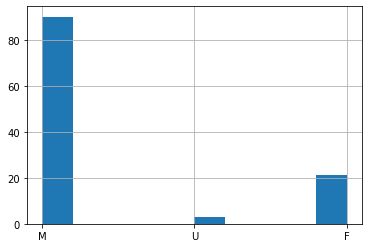

In [46]:
gender = corpus['au-gender']
ratio_female = (gender == 'F').sum() / gender.count()
ratio_male = (gender == 'M').sum() / gender.count()
ratio_other = 1 - ratio_female - ratio_male
print('Set of all occuring values:', set(gender.values))
print(
    f'% of female authors: \t{ratio_female:.3f}\n'
    f'% of male authors: \t{ratio_male:.3f}\n'
    f'% of unknown/other: \t{ratio_other:.3f}'
)
gender.hist()

### Text length
Data is in the column 'size', possible values are 'short', 'medium', 'long'.

% of short texts: 	0.491
% of medium texts: 	0.289
% of long texts: 	0.219


<AxesSubplot:>

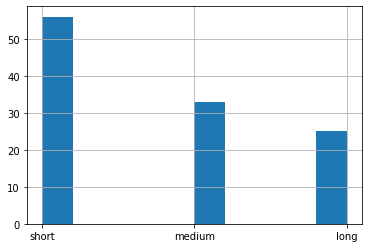

In [40]:
size = corpus['size']
ratio_size_short = (size == 'short').sum() / size.count()
ratio_size_med = (size == 'medium').sum() / size.count()
ratio_size_long = (size == 'long').sum() / size.count()
print(
    f'% of short texts: \t{ratio_size_short:.3f}\n'
    f'% of medium texts: \t{ratio_size_med:.3f}\n'
    f'% of long texts: \t{ratio_size_long:.3f}'
)
size.hist()

### Year of first publication
Data is in the column 'firsted-yr'. However, possible values can be single years `(yyyy)`, year spans `(yyyy-yyyy)`, the floating point number value `NaN`, or even a string like `'unknown'`. Therefore, we need to clean up a bit before we can use it.

<AxesSubplot:>

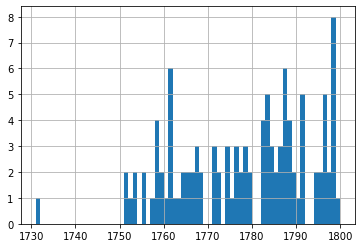

In [51]:
def adjust_year_range(year):
    '''
    The 'firsted-yr' column sometimes contains a range (e.g. '1782-1783'), and
    sometimes 'unknown' or NaN. For the moment, let's use the first year
    of a range, and use NaN whenever we have no valid year available. For consistency,
    we use float as dtype as that's the type of NaN.
    '''
    if year == 'unknown':
        return np.nan
    try:
        start, end = year.split('-')
        return float(start)
    except (ValueError, AttributeError):
        return float(year)


corpus['firsted-yr-adj'] = corpus['firsted-yr'].apply(adjust_year_range)
pubyear = corpus['firsted-yr-adj']
time_range = int(pubyear.max()-pubyear.min())
pubyear.hist(bins=time_range)

### Narrative form
Data is in the column 'form'. Possible values include `'mixed'`, `'autodiegetic'`, `'heterodiegetic'`, `'homodiegetic'`, `'epistolary'`, `'dialogue novel'` and unfortunately also `NaN`.

Set of all values:  {nan, 'mixed', 'autodiegetic', 'heterodiegetic', 'homodiegetic', 'epistolary', 'dialogue novel'}
% of mixed: 	0.036
% of autodiegetic: 	0.250
% of heterodiegetic: 	0.348
% of homodiegetic: 	0.036
% of epistolary: 	0.268
% of dialogue novel: 	0.062


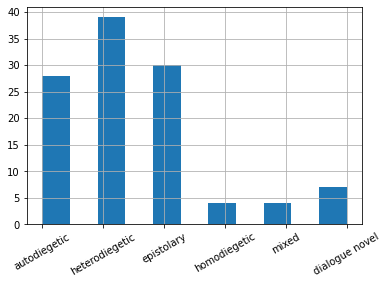

In [94]:
form = corpus['form']
print('Set of all values: ', set(form.values))
print('\n'.join([
    f'% of {kind}: \t{((form==kind).sum()/form.count()):.3f}'
    for kind in [
        'mixed', 'autodiegetic', 'heterodiegetic', 'homodiegetic',
        'epistolary', 'dialogue novel'
    ]
]))
h = form.hist(bins=11)
h.xaxis.set_tick_params(labelrotation=30)